In [95]:
#we need to import some necessary libraries for given data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix , precision_score,recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn import preprocessing
import warnings
from warnings import filterwarnings

filterwarnings("ignore")

In [96]:
#Load the data set
df=pd.read_csv("/Users/sibu/Downloads/sample_data.csv")
df.head()

,pmt_1,pmt_2,pmt_3,pmt_4,variety
0,5.1,3.5,1.4,0.2,product_1
1,4.9,3.0,1.4,0.2,product_1
2,4.7,3.2,1.3,0.2,product_1
3,4.6,3.1,1.5,0.2,product_1
4,5.0,3.6,1.4,0.2,product_1


In [97]:
#on the above data  4 input features and one target feature named “variety”.


In [98]:
df.shape  #here we have to check the shape of data

(150, 5)

In [99]:
#we have to check whether there is null value in the given data set or not,so we use isnull method to check,if there is
#null value then either drop the row or fill the nan values to their mean of respective column..

df.isnull().sum()

pmt_1      0
pmt_2      0
pmt_3      0
pmt_4      0
variety    0
dtype: int64

In [100]:
#there is no nan value present in the data set

In [101]:
df.info() #The info() method prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pmt_1    150 non-null    float64
 1   pmt_2    150 non-null    float64
 2   pmt_3    150 non-null    float64
 3   pmt_4    150 non-null    float64
 4   variety  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [102]:
#we use describe() because generate descriptive statistics of the data in above DataFrame 
df.describe()      

,pmt_1,pmt_2,pmt_3,pmt_4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [103]:
#our target feature consist categorical data so we use value_counts() to count the number of occurrences 
#of each unique value in variety column.
df['variety'].value_counts()

variety
product_1    50
product_2    50
product_3    50
Name: count, dtype: int64

# VISUALIZATION OF THE DATA

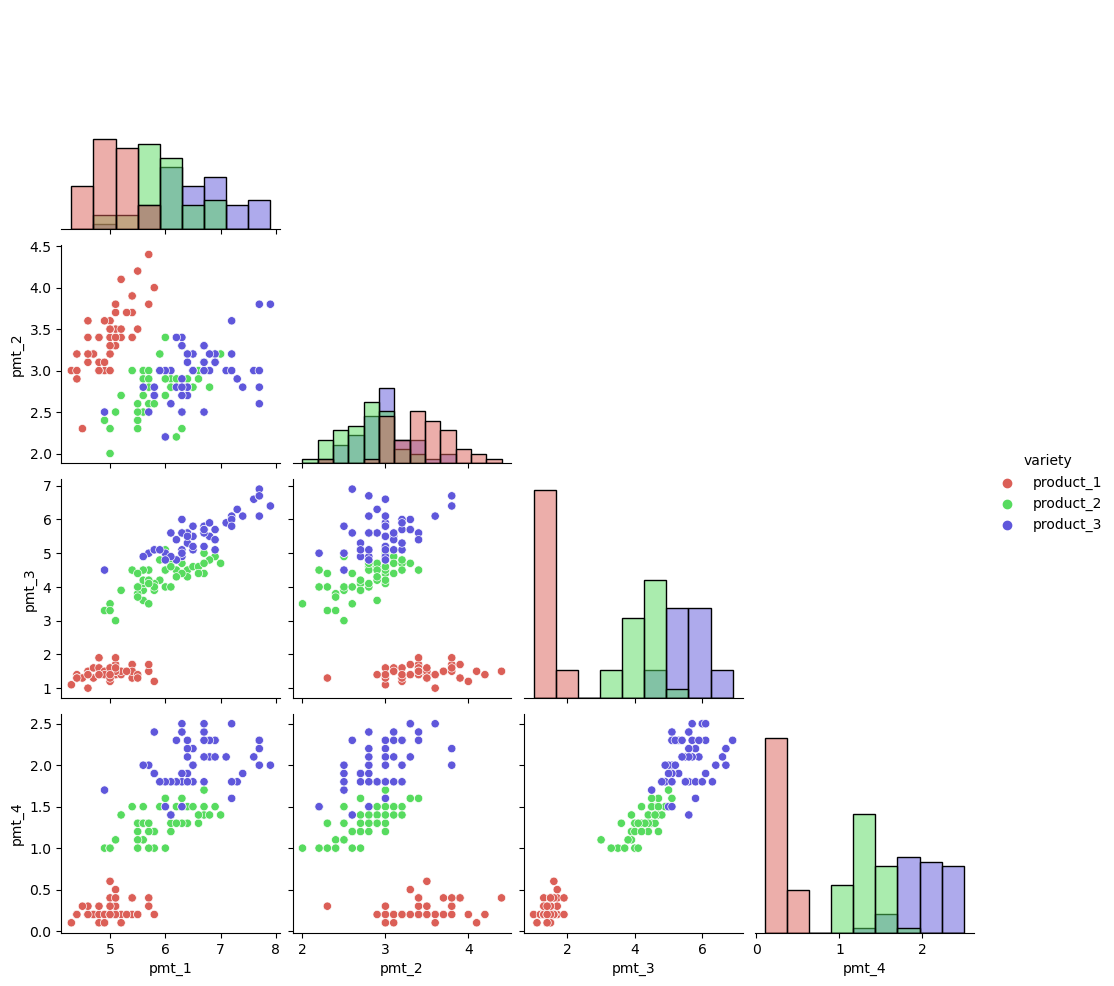

In [104]:
#draw the pair plot for the diagram
sns.pairplot(df , hue='variety' , diag_kind="hist" , corner=True , palette = 'hls')

<function matplotlib.pyplot.show(close=None, block=None)>

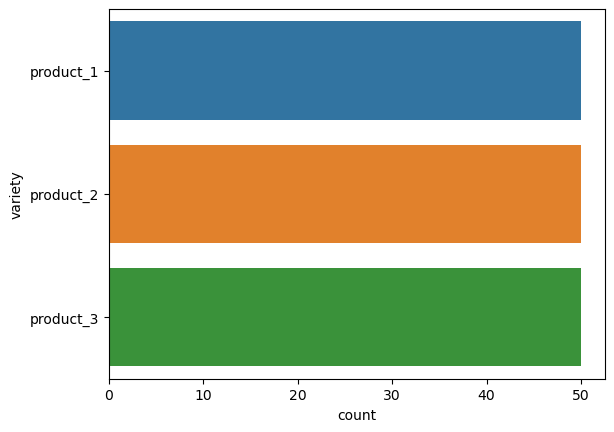

In [105]:
#draw a bar chat to display number of products for each category

sns.countplot(y=df['variety'])
plt.show

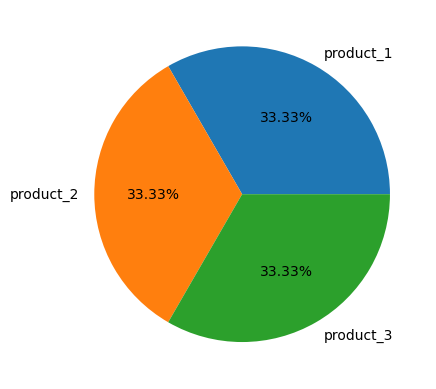

In [106]:
#display the percentage of catagories in variety colmn using pie chart
plt.pie(df['variety'].value_counts(),autopct="%0.2f%%",labels=['product_1','product_2','product_3'])
plt.show()

In [107]:
#Apply level encoding to the variety column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['variety']=le.fit_transform(df['variety'])
df

,pmt_1,pmt_2,pmt_3,pmt_4,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [108]:
#check for duplicates data in data frame
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [109]:
#drop duplicate rows and store the new data frame in df1 as variable name
df1=df.drop_duplicates()
df1

,pmt_1,pmt_2,pmt_3,pmt_4,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [110]:
#Now check the shape of df1
df1.shape

(149, 5)

# separate input and output

In [111]:
x=df1.drop(columns=['variety'])
y = df1["variety"]

# Split the model for training and  testing 

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 5)

In [113]:
x_train.shape

(119, 4)

In [114]:
x_test.shape

(30, 4)

In [115]:
y_train.shape

(119,)

In [116]:
y_test.shape

(30,)

# LOGISTIC REGRESSION

In [170]:


# Implement Logistic Regression Model
from sklearn.linear_model import LogisticRegression
L=LogisticRegression()
#train the model by using traing dataset
L.fit(x_train,y_train)
#test the model
y_pred_lg=L.predict(x_test)
#Find the accuracy
from sklearn.metrics import accuracy_score
acc_lg=accuracy_score(y_test,y_pred_lg)
acc_lg=round(acc_lg*100,2)
print("accuracy in logistic regression is",acc_lg,"%")

accuracy in logistic regression is 90.0 %


In [171]:
#Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_lg)
cm

array([[ 9,  0,  0],
       [ 0, 12,  2],
       [ 0,  1,  6]])

<Axes: >

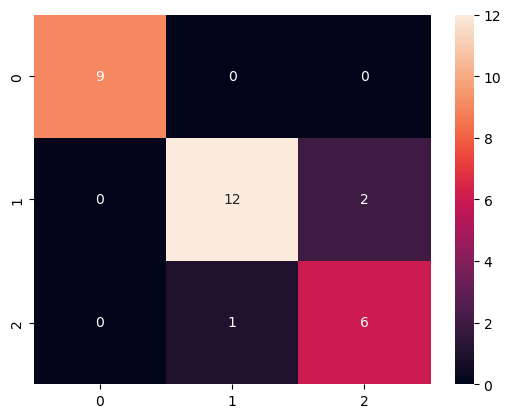

In [172]:
sns.heatmap(cm,annot=True)

# Naive Bayes

In [173]:
#split the model for training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 10)

#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB

NB=GaussianNB()
#train the model by using traing dataset
NB.fit(x_train,y_train)
#test the model
y_pred_NB=NB.predict(x_test)
#Find the accuracy
from sklearn.metrics import accuracy_score
acc_NB=accuracy_score(y_test,y_pred_NB)
acc_NB=round(acc_NB*100,2)
print("accuracy in Naive bayes is",acc_NB,"%")

accuracy in Naive bayes is 93.33 %


In [174]:
#Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_NB)
cm

array([[ 9,  0,  0],
       [ 0, 12,  2],
       [ 0,  0,  7]])

<Axes: >

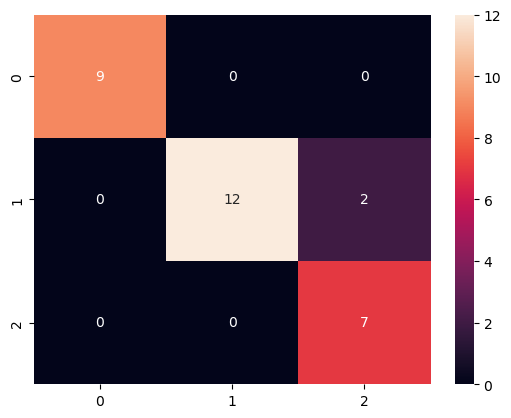

In [175]:
sns.heatmap(cm,annot=True)

# DECISSION TREE

In [176]:
#split the model for training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 16)

#import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier()
#train the model by using traing dataset
DT.fit(x_train,y_train)
#test the model
y_pred_DT=DT.predict(x_test)
#Find the accuracy
from sklearn.metrics import accuracy_score
acc_DT=accuracy_score(y_test,y_pred_DT)
acc_DT=round(acc_DT*100,2)
print("accuracy in decission tree is",acc_DT,"%")

accuracy in decission tree is 90.0 %


In [177]:
#Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_DT)
cm

array([[10,  0,  0],
       [ 0, 11,  1],
       [ 0,  2,  6]])

<Axes: >

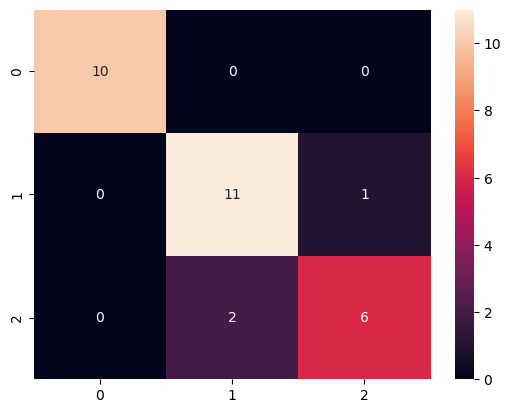

In [178]:
sns.heatmap(cm,annot=True)

# Random Forest

In [179]:
#split the data into training and testing purposes

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 20)

#import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

#train the model by using traing dataset
RF.fit(x_train,y_train)

#test the model
y_pred_RF=RF.predict(x_test)


#Find the accuracy
from sklearn.metrics import accuracy_score
acc_RF=accuracy_score(y_test,y_pred_RF)
acc_RF=round(acc_RF*100,2)
print("accuracy in Random forest",acc_RF,"%")

accuracy in Random forest 96.67 %


In [180]:
#Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_RF)
cm

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 10]])

<Axes: >

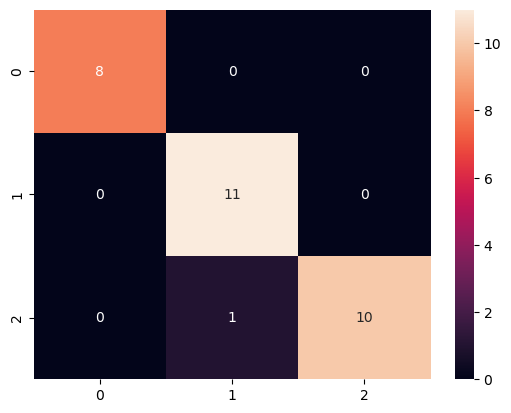

In [181]:
sns.heatmap(cm,annot=True)

# SUPPORT VECTOR MACHINE

In [182]:
#split the data into training and testing purposes

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 18)

#import svc from sklearn
from sklearn.svm import SVC
SVM = SVC()
#train the model by using traing dataset
SVM.fit(x_train,y_train)

#test the model
y_pred_SVM=SVM.predict(x_test)


#Find the accuracy
from sklearn.metrics import accuracy_score
acc_SVM=accuracy_score(y_test,y_pred_SVM)
acc_SVM=round(acc_SVM*100,2)
print("accuracy in Svm",acc_SVM,"%")

accuracy in Svm 100.0 %


In [183]:
#Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_SVM)
cm

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 12]])

<Axes: >

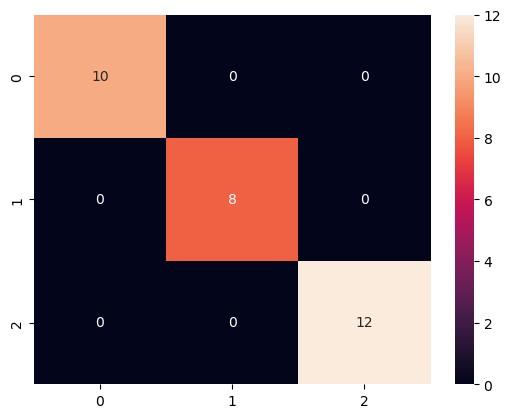

In [184]:
sns.heatmap(cm,annot=True)

# K Nearest Neighbors

In [185]:
#split the data into training and testing purposes

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 55)

#import KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
k=3
KNN = KNeighborsClassifier(k)

#train the model by using traing dataset
KNN.fit(x_train,y_train)

#test the model
y_pred_KNN = KNN.predict(x_test)


#Find the accuracy
from sklearn.metrics import accuracy_score
acc_KNN=accuracy_score(y_test,y_pred_KNN)
acc_KNN=round(acc_KNN*100,2)
print("accuracy in Knn",acc_KNN,"%")

accuracy in Knn 90.0 %


In [187]:
#Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_KNN)
cm

array([[ 9,  0,  0],
       [ 0, 12,  2],
       [ 0,  1,  6]])

<Axes: >

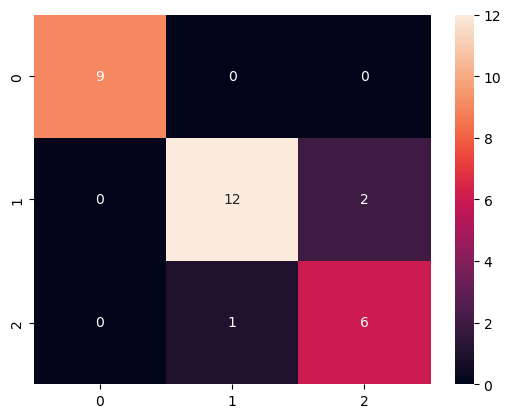

In [188]:
sns.heatmap(cm,annot=True)

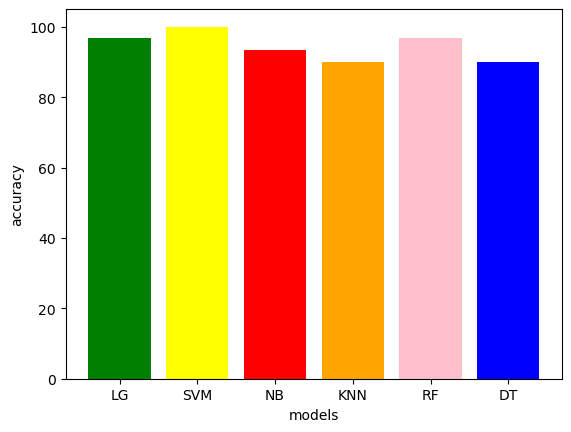

In [169]:
models=['LG','SVM','NB','KNN','RF','DT']
accuracy=[acc_lg,acc_SVM,acc_NB,acc_KNN,acc_RF,acc_DT]
plt.bar(models,accuracy,color=['green','yellow','red','orange','pink','blue'])
plt.xlabel("models")
plt.ylabel("accuracy")
plt.show()

# CONCLUSION

In [189]:
#IN this project we used 6 ML models ,we found that Support vector machine model's accuracy is highest i.e. 100%.
#HEnce the selected model for this project is SVM